In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/home/brian/Documents/CPS/data/clean/')

In [2]:
cols = ['YEAR', 'MONTH', 'BASICWGT', 'INDM', 'LFS']
df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=cols) for year in range(1989, 2023)])

In [3]:
data = df.groupby(['YEAR', 'MONTH', 'INDM']).BASICWGT.sum().unstack()

In [4]:
dates = [pd.to_datetime(f'{year}-{month}-01') for year, month in data.index]

In [5]:
data.index = dates

In [6]:
data = data[data > 0].dropna()

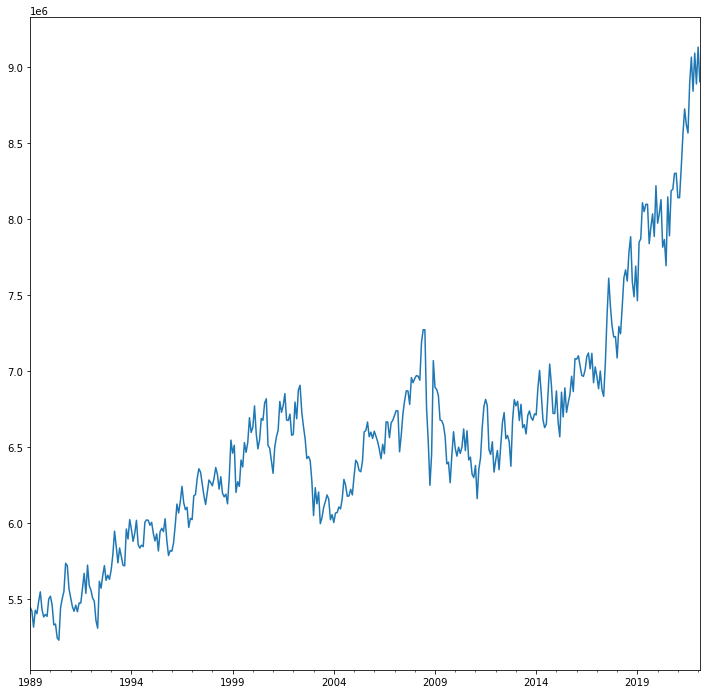

In [7]:
data['Transportation'].plot(figsize=(12, 12));